In [10]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


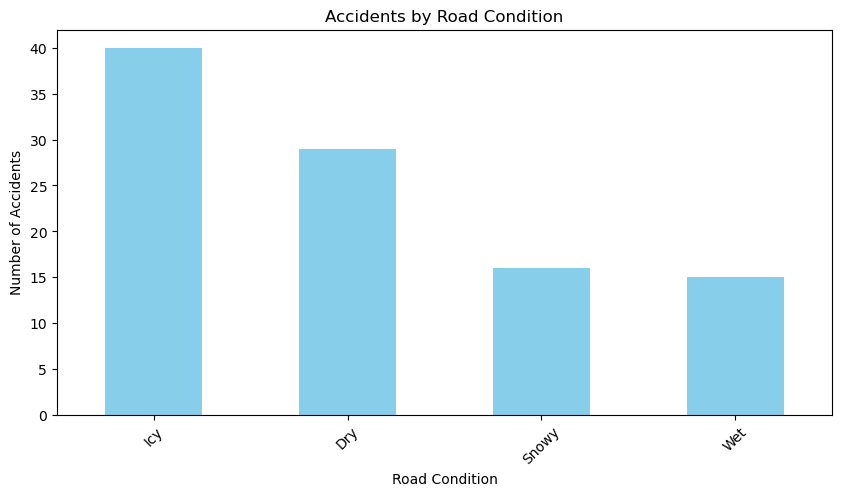

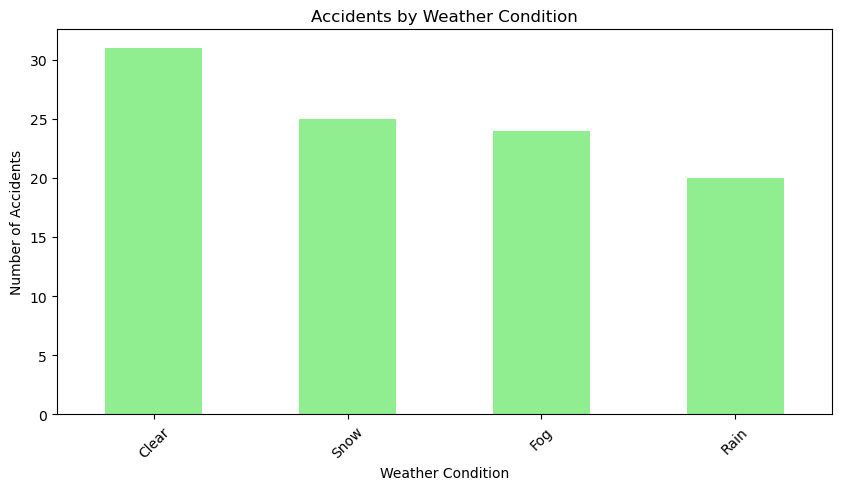

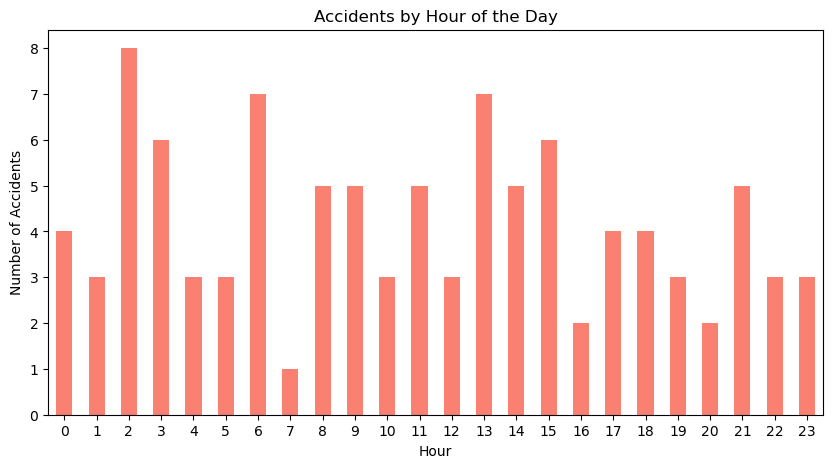

Heatmap saved as 'accident_heatmap.html'. Open it in a browser to view.


In [11]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset
data = {
    'Accident_ID': range(1, 101),
    'Latitude': np.random.uniform(low=35.0, high=37.0, size=100),  # Random latitudes
    'Longitude': np.random.uniform(low=-120.0, high=-118.0, size=100),  # Random longitudes
    'Road_Condition': np.random.choice(['Dry', 'Wet', 'Icy', 'Snowy'], size=100),
    'Weather_Condition': np.random.choice(['Clear', 'Rain', 'Fog', 'Snow'], size=100),
    'Time': np.random.choice([f'{hour:02}:{minute:02}' for hour in range(24) for minute in range(0, 60, 15)], size=100),
    'Severity': np.random.choice(['Minor', 'Moderate', 'Severe'], size=100)
}

df = pd.DataFrame(data)

# Step 2: Analyze the data
road_condition_counts = df['Road_Condition'].value_counts()
weather_condition_counts = df['Weather_Condition'].value_counts()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
hourly_accidents = df['Hour'].value_counts().sort_index()

# Step 3: Visualizations
# 3.1 Bar plot for accidents by road condition
plt.figure(figsize=(10, 5))
road_condition_counts.plot(kind='bar', color='skyblue')
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 3.2 Bar plot for accidents by weather condition
plt.figure(figsize=(10, 5))
weather_condition_counts.plot(kind='bar', color='lightgreen')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 3.3 Bar plot for accidents by hour
plt.figure(figsize=(10, 5))
hourly_accidents.plot(kind='bar', color='salmon')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# 3.4 Heatmap for accident hotspots
heatmap_data = df[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).size().reset_index(name='counts')
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
heatmap_map = folium.Map(location=map_center, zoom_start=12)

# Create heatmap
HeatMap(data=heatmap_data[['Latitude', 'Longitude', 'counts']].values, radius=15).add_to(heatmap_map)

# Save and display the heatmap
heatmap_map.save('accident_heatmap.html')
print("Heatmap saved as 'accident_heatmap.html'. Open it in a browser to view.")
